<a href="https://colab.research.google.com/github/Mo967tech/Heart-Beat-Classification/blob/main/Session_10_revision_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **supervised classification**
# **decision tree**
# **KNN**
# **SVC**
# **random forest**
# **Logistic regression**

In [ ]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
replace mitbih_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mitbih_test.csv         
replace mitbih_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mitbih_train.csv        y

replace ptbdb_abnormal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: ptbdb_abnormal.csv      
replace ptbdb_normal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ptbdb_normal.csv        


# **Import Important Libraries**

In [ ]:
!pip install imblearn
!pip install imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter # Import the Counter class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight
warnings.filterwarnings('ignore')

In [ ]:
mitbih_train = pd.read_csv('/content/mitbih_train.csv')
mitbih_test = pd.read_csv('/content/mitbih_test.csv')
# pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

In [ ]:
for index, col_name in enumerate(mitbih_train.columns):
  mitbih_train.rename(columns={col_name: f"F{index}"},inplace=True)

for index, col_name in enumerate(mitbih_test.columns):
  mitbih_test.rename(columns={col_name: f"F{index}"},inplace=True)

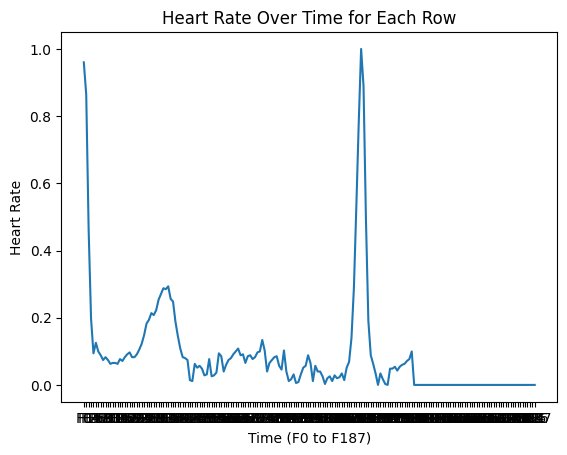

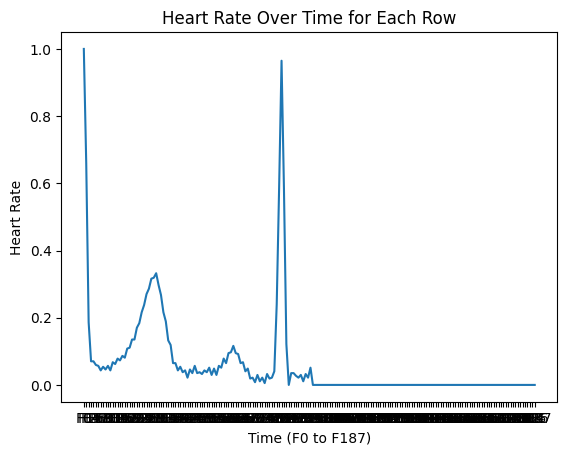

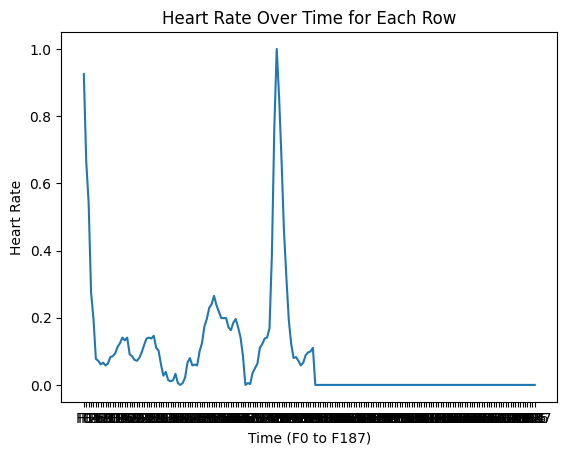

In [ ]:
for i in range(3):
  plt.plot(mitbih_train.columns[:], mitbih_train.iloc[i, :])  # Exclude the last column if it's not part of the heart rate data
  plt.xlabel('Time (F0 to F187)')
  plt.ylabel('Heart Rate')
  plt.title(f'Heart Rate Over Time for Row {i}')
  plt.title('Heart Rate Over Time for Each Row')
  plt.show()

In [ ]:
scaler = StandardScaler()

for col in mitbih_train.columns:
  if col != 'F187':
    mitbih_train[col] = scaler.fit_transform(mitbih_train[[col]])

for col in mitbih_test.columns:
  if col != 'F187':
    mitbih_test[col] = scaler.fit_transform(mitbih_test[[col]])

In [ ]:
X_train = mitbih_train.drop('F187', axis=1)
y_train = mitbih_train['F187']

X_test = mitbih_test.drop('F187', axis=1)
y_test = mitbih_test['F187']

In [ ]:
class_counts = Counter(y_train)
max_count = max(class_counts.values())

sampling_strategy = {k: min(v * 2, max_count) for k, v in class_counts.items()}
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
pca = PCA(n_components=0.95) # 95% of variance
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8350920469599379


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18117
         1.0       0.83      0.62      0.71       556
         2.0       0.83      0.92      0.87      1448
         3.0       0.79      0.54      0.64       162
         4.0       0.97      0.96      0.96      1608

    accuracy                           0.96     21891
   macro avg       0.88      0.80      0.83     21891
weighted avg       0.96      0.96      0.96     21891



In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9645516422273994
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     18117
         1.0       0.83      0.62      0.71       556
         2.0       0.83      0.92      0.87      1448
         3.0       0.79      0.54      0.64       162
         4.0       0.97      0.96      0.96      1608

    accuracy                           0.96     21891
   macro avg       0.88      0.80      0.83     21891
weighted avg       0.96      0.96      0.96     21891

[[17817    64   182    15    39]
 [  162   342    51     0     1]
 [   97     4  1333     7     7]
 [   48     0    27    87     0]
 [   62     1     8     1  1536]]


In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, svc_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9097802749988579


In [ ]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95     18117
         1.0       0.44      0.65      0.52       556
         2.0       0.69      0.92      0.79      1448
         3.0       0.20      0.82      0.32       162
         4.0       0.91      0.98      0.94      1608

    accuracy                           0.91     21891
   macro avg       0.64      0.86      0.70     21891
weighted avg       0.94      0.91      0.92     21891



In [ ]:
confusion_matrix = confusion_matrix(y_test, svc_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[16512   445   508   501   151]
 [  121   359    65     6     5]
 [   68    13  1337    24     6]
 [    9     0    20   133     0]
 [   21     6     5     1  1575]]


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, knn_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, knn_pred))

Accuracy: 0.9360467772143803
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96     18117
         1.0       0.44      0.76      0.56       556
         2.0       0.79      0.94      0.86      1448
         3.0       0.32      0.69      0.44       162
         4.0       0.94      0.98      0.96      1608

    accuracy                           0.94     21891
   macro avg       0.70      0.86      0.75     21891
weighted avg       0.95      0.94      0.94     21891



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, lr_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, lr_pred))

Accuracy: 0.5193915307660683
              precision    recall  f1-score   support

         0.0       0.98      0.46      0.63     18117
         1.0       0.13      0.58      0.21       556
         2.0       0.19      0.74      0.31      1448
         3.0       0.06      0.86      0.10       162
         4.0       0.53      0.91      0.67      1608

    accuracy                           0.52     21891
   macro avg       0.38      0.71      0.38     21891
weighted avg       0.86      0.52      0.59     21891

